In [10]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,Dense,Flatten,MaxPooling2D
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time

In [11]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()
print(train_x.shape,train_y.shape,train_x.dtype,type(train_x))
def process(x,y=None):
    x = x.reshape((x.shape[0],x.shape[1],x.shape[2],1)) # np.squeeze() 移除维度 没有unsqueeze
    x = x.astype(np.float32) / 255
    y = to_categorical(y)
    return x ,y
train_x,train_y =process(train_x,train_y)
test_x,test_y =process(test_x,test_y)
print(train_x.shape,train_y.shape)

(60000, 28, 28) (60000,) uint8 <class 'numpy.ndarray'>
(60000, 28, 28, 1) (60000, 10)


In [12]:
cnn = Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))
cnn.summary()
# 卷积：28-3++1 =26 总数为 64*9+64 偏置64个，核64个，每个有9个参数
# 池化：26//2=13 参数=0
# 展平：0
# 全连接 ： 输入=13*13*64=10186 输出 128 总：10186*128+128=1384576
# 输出：128*10+10=1290

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


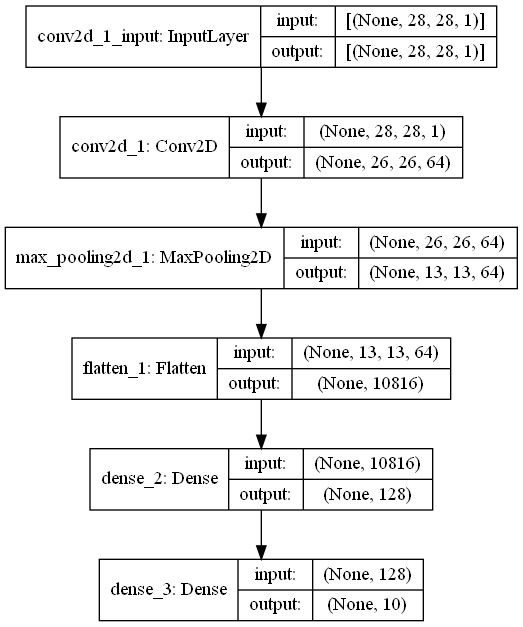

In [11]:
plot_model(cnn,to_file='cnn_mnist_helloWorld.png',show_shapes=True,show_layer_names=True)

In [13]:
callbacks = TensorBoard(log_dir="logs/mnist",histogram_freq=1,write_graph=True)
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# cd C:\Users\chenb\jupyterLab   tensorboard --logdir="logs/mnist"  http://localhost:6006/
history = cnn.fit(train_x,train_y,epochs=5,batch_size=64,validation_split=0.1,callbacks=[callbacks])
# https://keras.io/zh/losses/

Epoch 1/5
844/844 [==============================] - 15s 17ms/step - loss: 0.1690 - accuracy: 0.9499 - val_loss: 0.0585 - val_accuracy: 0.9845
Epoch 2/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0572 - val_accuracy: 0.9848
Epoch 3/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0524 - val_accuracy: 0.9865
Epoch 4/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 5/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0513 - val_accuracy: 0.9873


In [16]:
test_results = cnn.evaluate(test_x,test_y,return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9854


In [17]:
test_pred = cnn.predict(test_x)
print(test_pred.shape)

(10000, 10)


In [18]:
test_pred_label = tf.argmax(test_pred,axis=1).numpy()
test_true_label = tf.argmax(test_y,axis=1).numpy()
acu = sum(test_pred_label==test_true_label)/len(test_true_label)
print(acu)

0.9854
